In [19]:
import pandas as pd
import os

In [20]:
Fname="\\institutions_ROR_id.csv"
Fdir="E:\PYTHON_work_learn\Python_work\Anu_Project\CSV_output"
FnameFull=Fdir+Fname

In [21]:
FnameFull

'E:\\PYTHON_work_learn\\Python_work\\Anu_Project\\CSV_output\\institutions_ROR_id.csv'

In [22]:
clist=[s for s in range(1,16)]
clist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [23]:
df=pd.read_csv(FnameFull,usecols=clist)

In [24]:
df

,qROR_id,id_institution,abbreviation,name,city,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
0,NaN,1,AWI@FRIGOROPA,Polarstern core repository,27572 Bremerhaven,hannes.grobe@awi.de,Germany,+49 471 4831 1149,+49 471 4831 1220,NaN,Kühlhausstrasse 9,http://www.awi-bremerhaven.de/GEO/CoreRepository/,NaN,NaN,7.0
1,https://ror.org/04ers2y35,4,GeoB,"Department of Geosciences, Bremen University",28359 Bremen,NaN,Germany,+49 421 218 3116,+49 421 218 3585,NaN,Klagenfurter Strasse,http://www.geo.uni-bremen.de/page.php?langid=EN,NaN,NaN,7.0
2,https://ror.org/01xtthb56,5,GEOOSLO,"Department of Geosciences, University of Oslo",N-0316 Oslo 3,NaN,Norway,+47 22 85 4215,+47 22 85 6656,NaN,P.O. Box 1047 Blindern,http://www.geo.uio.no/english/,NaN,NaN,7.0
3,https://ror.org/02h2x0161,6,IFM-GEOMAR,IFM-GEOMAR Leibniz-Institute of Marine Science...,24148 Kiel,wbrueckmann@ifm-geomar.de,Germany,+49 431 600 2941,+49 431 600 2500 Sec,NaN,Wischhofstrasse 1-3,http://www.geomar.de,NaN,NaN,7.0
4,https://ror.org/01y9bpm73,8,IMGP,"Göttinger Zentrum für Geowissenschaften, Unive...",37077 Göttingen,NaN,Germany,+49 551 397 996,+49 551 397 900,NaN,Goldschmidt-Strasse 3,http://www.imgp.gwdg.de/,NaN,NaN,7.0
5,https://ror.org/04v76ef78,9,GIK,"Geologisch-Paläontologisches Institut, Christi...",24098 Kiel,name changed to Inst. für Geowissenschaften,Germany,NaN,NaN,NaN,NaN,http://www.ifg.uni-kiel.de/,NaN,0.0,7.0
6,https://ror.org/01se4f844,11,IES,"Institute of Geography and Earth Sciences, Uni...","Aberystwyth, SY23 3DB, Wales",glawww@aber.ac.uk,United Kingdom,+44 1970 622 780,+44 1970 622 781,NaN,Ceredigion,http://www.aber.ac.uk/~gbb/chome.html,NaN,NaN,7.0
7,NaN,13,RGD,"Rijks Geologische Dienst, Marine Geology Depar...",2000 AD Haarlem,NaN,The Netherlands,NaN,023-319362,NaN,P.O. Box 157,NaN,NaN,NaN,7.0
8,https://ror.org/02dvf9b44,15,IUPH,"Institut für Umweltphysik, Heidelberger Akadem...",69120 Heidelberg,Bernd Kromer,Germany,+49 6221 546 405,+49 6221 546 357,NaN,Im Neuenheimer Feld 366,http://www.uphys.uni-heidelberg.de/,NaN,NaN,7.0
9,TypeError occured while reading name or country,17,n_g,not_given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


### Time to make some requests 

In [25]:
import requests

## Query functions

In [37]:
def getresponse(url,params):
    try:
        r=requests.get(url,params=params)
        if r.status_code!=200:
            raise requests.HTTPError
        return r
    except requests.exceptions.HTTPError:
        return("Http error!")
    except requests.exceptions.ConnectionError:
        return("Connection Error!")
    except requests.exceptions.Timeout:
        return("Timeout error!")
    except requests.exceptions.RequestException:
        return("Unknown  Requests error occured!") 

In [38]:
# N - number of the element that we take, usually we take the first Json element
def rparser(response):
    try:
        if type(response)!=requests.models.Response:
            raise TypeError
        jout=response.json()
        if jout["number_of_results"]!=0:
            return jout['items']
        else:
            print("empty response!")
            return None 
    except TypeError:
        return "wrong input type!"
    except KeyError:
        return "KeyError - query API error"

## Affiliation matching Test

In [39]:
N=12
df.loc[[N]]

,qROR_id,id_institution,abbreviation,name,city,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
12,NaN,20,DGGE,"Department of Geology and Geophysics, Universi...","Edinburgh, EH9 3JW",NaN,Scotland,+44 131 668 3184,+44 131 6504846,NaN,West Mains Road,NaN,NaN,NaN,7.0


affiliation

In [40]:
# throw out some labels before creating affiliation string
afflist=df.loc[N].drop(labels=['qROR_id','id_institution_type','id_user_created','phone','fax','id_institution'])
afflist

abbreviation                                                 DGGE
name            Department of Geology and Geophysics, Universi...
city                                           Edinburgh, EH9 3JW
contact                                                       NaN
country                                                  Scotland
state                                                         NaN
street                                            West Mains Road
uri                                                           NaN
uri_semantic                                                  NaN
Name: 12, dtype: object

In [41]:
afflist=[s for s in afflist if type(s)==str]
afflist

['DGGE',
 'Department of Geology and Geophysics, University of Edinburgh',
 'Edinburgh, EH9 3JW',
 'Scotland',
 'West Mains Road']

In [42]:
API_url="https://api.ror.org/organizations"
Affstr=",".join(afflist)
params={"affiliation":Affstr}
Affstr

'DGGE,Department of Geology and Geophysics, University of Edinburgh,Edinburgh, EH9 3JW,Scotland,West Mains Road'

In [45]:
r=getresponse(API_url,params)
r

<Response [200]>

In [46]:
print(r.url)

https://api.ror.org/organizations?affiliation=DGGE%2CDepartment+of+Geology+and+Geophysics%2C+University+of+Edinburgh%2CEdinburgh%2C+EH9+3JW%2CScotland%2CWest+Mains+Road


In [47]:
for s in r.json()["items"]:
    print("name=\t\t{name} \nid= \t\t{id} \nscore=\t\t{score}\nsubstring=\t{s}\nMatching type=\t{type}".format(type=s["matching_type"],s=s["substring"],score=s["score"],name=s["organization"]["name"],id=s["organization"]["id"]))
    print("chosen= \t{chosen}".format(chosen=s["chosen"]))
    print("#########")

name=		University of Edinburgh 
id= 		https://ror.org/01nrxwf90 
score=		1.0
substring=	University of Edinburgh
Matching type=	PHRASE
chosen= 	True
#########
name=		Edinburgh Napier University 
id= 		https://ror.org/03zjvnn91 
score=		0.85
substring=	Edinburgh University
Matching type=	HEURISTICS
chosen= 	False
#########
name=		Royal Society of Edinburgh 
id= 		https://ror.org/03kx2pj14 
score=		0.73
substring=	University of Edinburgh
Matching type=	COMMON TERMS
chosen= 	False
#########
name=		National Health Service Scotland 
id= 		https://ror.org/04za2st18 
score=		0.71
substring=	EH9 3JW Scotland
Matching type=	COMMON TERMS
chosen= 	False
#########
name=		Edinburgh Genomics 
id= 		https://ror.org/02z3r7t23 
score=		0.68
substring=	Edinburgh University
Matching type=	HEURISTICS
chosen= 	False
#########
name=		West Of Scotland Housing Association 
id= 		https://ror.org/00darb407 
score=		0.67
substring=	Scotland West Mains Road
Matching type=	COMMON TERMS
chosen= 	False
#########
name

## Affiliation matching fill

lets create a list of ROR_id's received by taking the first element of a affiliation matching result

In [48]:
aROR_list=[None]*len(df) # creating an empty list of fixed size - of length of database entries
mtype_list=[None]*len(df) #matching type
substring_list=[None]*len(df)
score_list=[None]*len(df)
RORname_list=[None]*len(df)
chosen_list=[None]*len(df)
API_url="https://api.ror.org/organizations"

In [49]:
def fparam(i):
    try:
        afflist=df.loc[i].drop(labels=['qROR_id','id_institution_type','id_user_created','phone','fax','id_institution'])
        afflist=[s for s in afflist if type(s)==str]
        params={"affiliation":",".join(afflist)}
        return params
    except TypeError:
        return "TypeError occured while creating affstring"

In [50]:
def iterator(i):
        params=fparam(i)
        r=getresponse(API_url,params)
        jdic=rparser(r)  
        if type(jdic)==list:
            s=jdic[0]  # we take the first element of Json object
            outdict={"matching_type":s["matching_type"],
                     "substring":s["substring"],
                     "score":s["score"],
                     "name":s["organization"]["name"],
                     "id":s["organization"]["id"],
                     "chosen":s["chosen"]}
        else:
            outdict={"matching_type":jdic,       # if rparser returned empty jdic=""
                     "substring":jdic,
                     "score":jdic,
                     "name":jdic,
                     "id":jdic,
                     "chosen":jdic}
        return outdict 

In [51]:
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [52]:
for i in range(0,len(df)-1):
    s=iterator(i)
#     print("\t\t\t\t\t ITERATION {n}".format(n=i))
#     print("PAN_DB_name= \t{names}".format(names=df["name"][i]))
#     print("ROR_DB_name=\t{name} \nid= \t\t{id} \nscore=\t\t{score}\nsubstring=\t{s}\nMatching type=\t{type}".format(type=s["matching_type"],s=s["substring"],score=s["score"],name=s["name"],id=s["id"]))
#     print("chosen= \t{chosen}".format(chosen=s["chosen"]))
#     print("---------------------------------------------------------------")
    
    printProgressBar(i,len(df)-1)
    aROR_list[i]=s["id"] # creating an empty list of fixed size - of length of database entries
    mtype_list[i]=s["matching_type"] #matching type
    substring_list[i]=s["substring"]
    score_list[i]=s["score"]
    RORname_list[i]=s["name"]
    chosen_list[i]=s["chosen"]

empty response!---------------------------------------------------------------------------------------| 1.4% 
empty response!██████████████████████████-------------------------------------------------------------| 39.9% 
empty response!████████████████████████████-----------------------------------------------------------| 41.7% 
empty response!█████████████████████████████████████--------------------------------------------------| 50.0% 
empty response!████████████████████████████████████████████-------------------------------------------| 57.6% 
empty response!███████████████████████████████████████████████████------------------------------------| 64.4% 
empty response!████████████████████████████████████████████████████████████████-----------------------| 78.0% 
empty response!███████████████████████████████████████████████████████████████████--------------------| 80.8% 
empty response!████████████████████████████████████████████████████████████████████████---------------| 85.2% 
em

Lets insert new ROR_id column!

In [58]:
df.insert(1,"aROR_id",aROR_list)

In [61]:
df.insert(2,"chosen",chosen_list)

In [63]:
df.insert(3,"score",score_list)

In [65]:
df.insert(4,"matching_type",mtype_list)

In [67]:
df.insert(5,"substring",substring_list)

In [69]:

df.insert(6,"ROR_name",RORname_list)

In [70]:
df

,qROR_id,aROR_id,chosen,score,matching_type,substring,ROR_name,id_institution,abbreviation,name,...,contact,country,fax,phone,state,street,uri,uri_semantic,id_institution_type,id_user_created
0,NaN,https://ror.org/032e6b942,True,1.00,ACRONYM,AWI,Alfred Wegener Institute for Polar and Marine ...,1,AWI@FRIGOROPA,Polarstern core repository,...,hannes.grobe@awi.de,Germany,+49 471 4831 1149,+49 471 4831 1220,NaN,Kühlhausstrasse 9,http://www.awi-bremerhaven.de/GEO/CoreRepository/,NaN,NaN,7.0
1,https://ror.org/04ers2y35,https://ror.org/04ers2y35,True,0.92,COMMON TERMS,Bremen University,University of Bremen,4,GeoB,"Department of Geosciences, Bremen University",...,NaN,Germany,+49 421 218 3116,+49 421 218 3585,NaN,Klagenfurter Strasse,http://www.geo.uni-bremen.de/page.php?langid=EN,NaN,NaN,7.0
2,https://ror.org/01xtthb56,https://ror.org/01xtthb56,True,1.00,PHRASE,University of Oslo,University of Oslo,5,GEOOSLO,"Department of Geosciences, University of Oslo",...,NaN,Norway,+47 22 85 4215,+47 22 85 6656,NaN,P.O. Box 1047 Blindern,http://www.geo.uio.no/english/,NaN,NaN,7.0
3,https://ror.org/02h2x0161,https://ror.org/02h2x0161,True,1.00,COMMON TERMS,IFM-GEOMAR,GEOMAR Helmholtz Centre for Ocean Research Kiel,6,IFM-GEOMAR,IFM-GEOMAR Leibniz-Institute of Marine Science...,...,wbrueckmann@ifm-geomar.de,Germany,+49 431 600 2941,+49 431 600 2500 Sec,NaN,Wischhofstrasse 1-3,http://www.geomar.de,NaN,NaN,7.0
4,https://ror.org/01y9bpm73,https://ror.org/01y9bpm73,False,0.86,PHRASE,Universität Göttingen,University of Göttingen,8,IMGP,"Göttinger Zentrum für Geowissenschaften, Unive...",...,NaN,Germany,+49 551 397 996,+49 551 397 900,NaN,Goldschmidt-Strasse 3,http://www.imgp.gwdg.de/,NaN,NaN,7.0
5,https://ror.org/04v76ef78,https://ror.org/04v76ef78,True,1.00,PHRASE,Christian-Albrechts-Universität,Kiel University,9,GIK,"Geologisch-Paläontologisches Institut, Christi...",...,name changed to Inst. für Geowissenschaften,Germany,NaN,NaN,NaN,NaN,http://www.ifg.uni-kiel.de/,NaN,0.0,7.0
6,https://ror.org/01se4f844,https://ror.org/002gsek34,False,1.00,ACRONYM,IES,Institute for Employment Studies,11,IES,"Institute of Geography and Earth Sciences, Uni...",...,glawww@aber.ac.uk,United Kingdom,+44 1970 622 780,+44 1970 622 781,NaN,Ceredigion,http://www.aber.ac.uk/~gbb/chome.html,NaN,NaN,7.0
7,NaN,https://ror.org/00wkygr69,False,0.62,FUZZY,Marine Geology Department,Maine Department of Marine Resources,13,RGD,"Rijks Geologische Dienst, Marine Geology Depar...",...,NaN,The Netherlands,NaN,023-319362,NaN,P.O. Box 157,NaN,NaN,NaN,7.0
8,https://ror.org/02dvf9b44,https://ror.org/02dvf9b44,True,1.00,PHRASE,Heidelberger Akademie der Wissenschaften,Heidelberg Academy of Sciences and Humanities,15,IUPH,"Institut für Umweltphysik, Heidelberger Akadem...",...,Bernd Kromer,Germany,+49 6221 546 405,+49 6221 546 357,NaN,Im Neuenheimer Feld 366,http://www.uphys.uni-heidelberg.de/,NaN,NaN,7.0
9,TypeError occured while reading name or country,https://ror.org/050draa26,False,0.48,FUZZY,n_g not_given,NRG Oncology,17,n_g,not_given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


## Statistical analysis of results

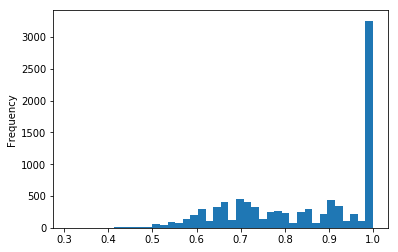

In [88]:
df["score"].plot(kind="hist",bins=40)

In [81]:
df["chosen"].describe()

count      9359
unique        2
top       False
freq       5305
Name: chosen, dtype: object

In [82]:
df["score"].describe()

count    9359.000000
mean        0.840360
std         0.153392
min         0.310000
25%         0.700000
50%         0.870000
75%         1.000000
max         1.000000
Name: score, dtype: float64

In [75]:
df.to_csv("institutions_Affil_match.csv",sep=",")

In [72]:
path=os.chdir("E:\PYTHON_work_learn\Python_work\Anu_Project\CSV_output")

In [74]:
print(os.getcwd())

E:\PYTHON_work_learn\Python_work\Anu_Project\CSV_output
